#### Handwritten Text Recognition

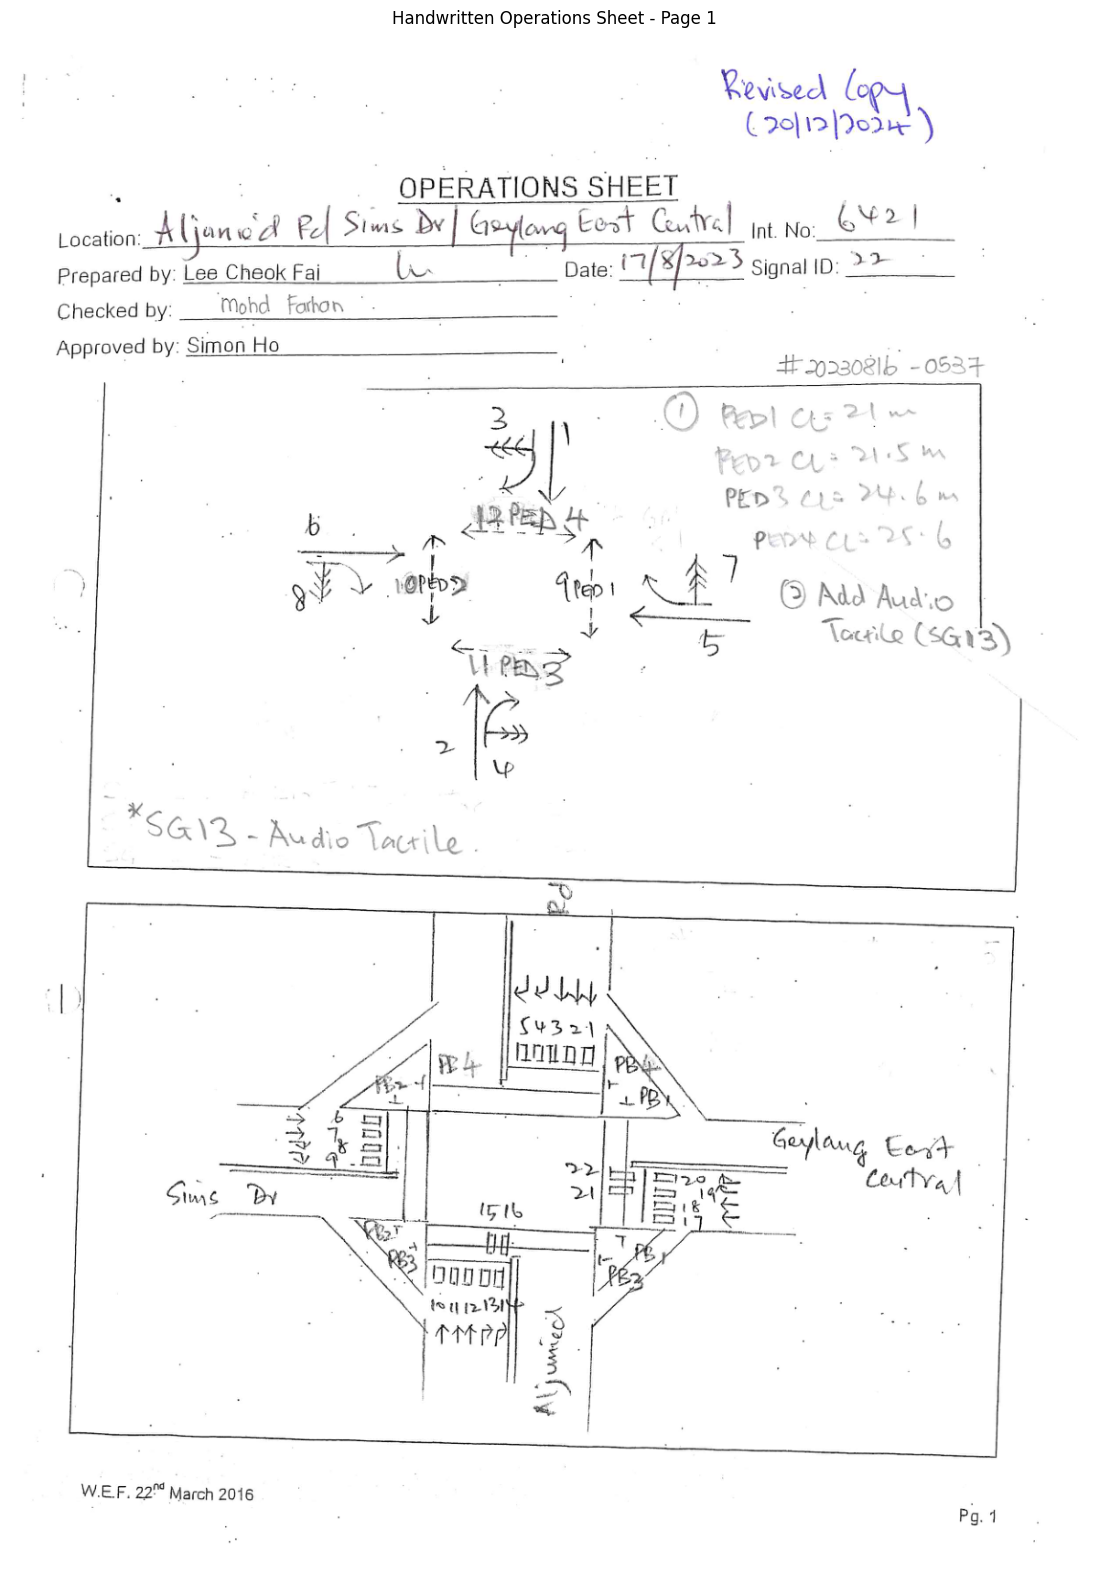

In [1]:
import os
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from PIL import Image
import io

# Define the path to the PDF file
pdf_path = r"../data/handwritten/6421 (22)_(X)(5-Phases)(RAG)(AT)_17Aug2023_#20230816-0537 (Revised Copy).pdf"

# Open the PDF file
pdf_document = fitz.open(pdf_path)

# Create a dictionary to store all pages as PIL Images
ops_sheet = {}

# Process each page in the PDF
for page_num in range(len(pdf_document)):
    # Get the page
    page = pdf_document[page_num]
    
    # Render the page as a pixmap (image)
    zoom = 2  # higher zoom for better resolution
    mat = fitz.Matrix(zoom, zoom)
    pix = page.get_pixmap(matrix=mat)
    
    # Convert pixmap to PIL Image
    img_data = pix.tobytes("png")
    img = Image.open(io.BytesIO(img_data))
    
    # Store the PIL image in the dictionary
    ops_sheet[page_num] = img

# Display the first page as an example
if ops_sheet:
    plt.figure(figsize=(15, 20))
    plt.imshow(ops_sheet[0])
    plt.axis('off')
    plt.title('Handwritten Operations Sheet - Page 1')
    plt.show()
    
# Close the PDF document
pdf_document.close()


In [2]:
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor

model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct",
    torch_dtype="auto",
    device_map="auto"
)

processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct")

c:\Users\chuaj\anaconda3\envs\work\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\chuaj\anaconda3\envs\work\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\chuaj\.cache\huggingface\hub\models--Qwen--Qwen2-VL-7B-Instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate de

In [5]:
image = ops_sheet[0] 
prompt = "Please extract all text from this image."

messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": prompt}
        ]
    }
]

text_prompt = processor.apply_chat_template(messages, add_generation_prompt=True)

inputs = processor(
    text=[text_prompt],
    images=[image],
    return_tensors="pt"
).to(model.device)


In [6]:
output = model.generate(**inputs, max_new_tokens=512)
response = processor.batch_decode(output, skip_special_tokens=True)[0]
print("Extracted Text:", response)


Extracted Text: system
You are a helpful assistant.
user
Please extract all text from this image.
assistant
Here is the extracted text from the image:

---

**OPERATIONS SHEET**

Location: Aljunied Rd | Sims Dr | Geylang East Central
Int. No.: 6421

Prepared by: Lee Cheok Fai
Date: 17/8/2023
Signal ID: 22

Checked by: Mohd Farhan

Approved by: Simon Ho

---

**Operations Diagram:**

```
  3
 / \
1   2
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|   |
|

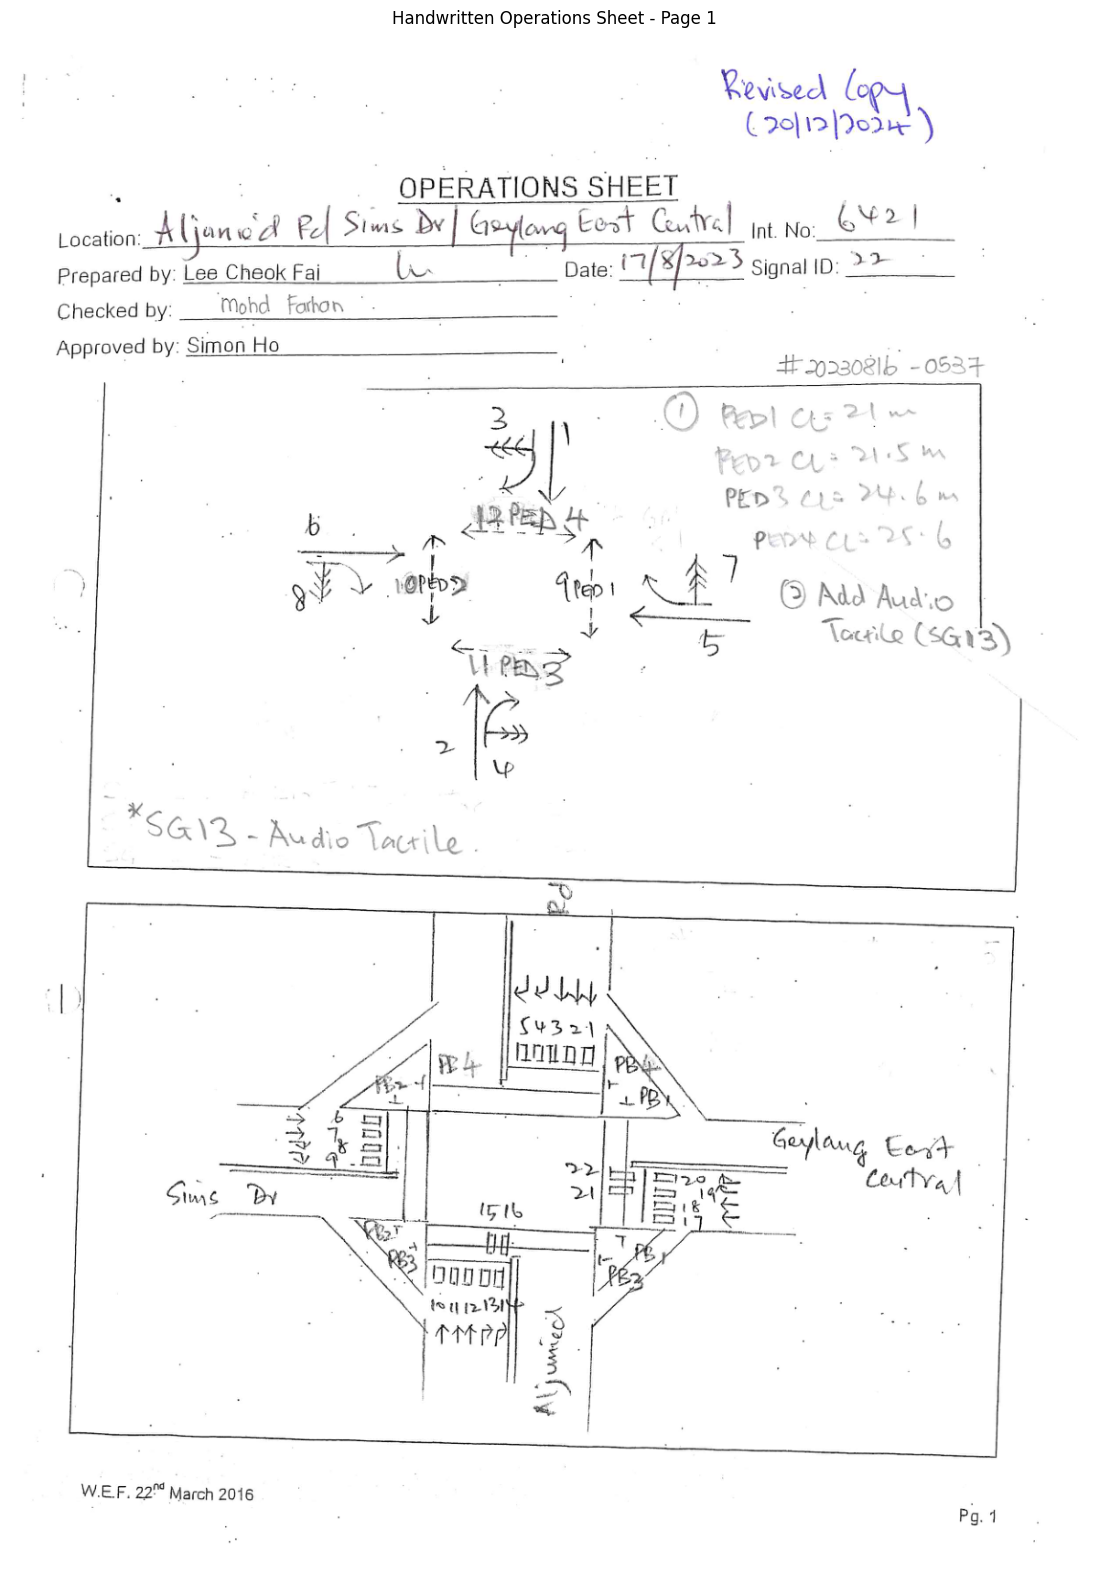

In [4]:
if ops_sheet:
    plt.figure(figsize=(15, 20))
    plt.imshow(ops_sheet[0])
    plt.axis('off')
    plt.title('Handwritten Operations Sheet - Page 1')
    plt.show()
    

image.png

In [ ]:
image.png